## Обучаем линейную регрессию с PyTorch

Будем предсказывать стоимость домов в Калифорнии при помощи линейной регрессии с использованием *PyTorch*.

In [ ]:
import torch
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing(as_frame=True)
california.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Для простоты в этом ноутбуке будем обучать одномерную линейную регрессию - будем предсказывать стоимость домов по среднему доходу жильцов дома (`MedInc`).

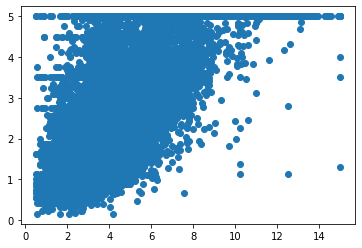

In [ ]:
plt.scatter(california.data['MedInc'], california.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

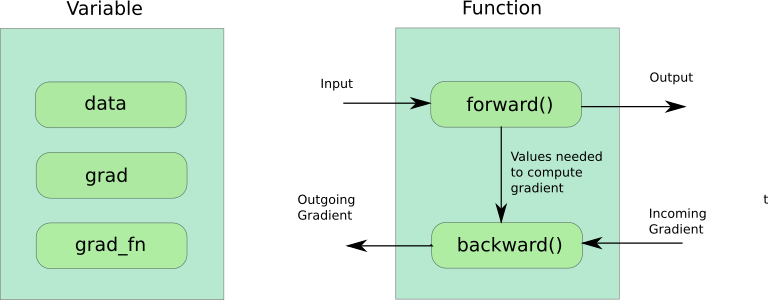

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиент для всех тензоров, у которых `requires_grad=True`.

Будем обучать линейную регрессию, которая делает предсказание по формуле
$$a(x) = w\cdot x + b.$$

Здесь w и b - неизвестные веса, по ним в процессе обучения модели градиентным спуском нужно вычислять градиент функции потерь, поэтому при использовании pytorch мы создаем тензоры w и b и указываем, что необходимо будет считать по ним градиент.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(california.data['MedInc'] / california.data['MedInc'].max(), dtype=torch.float32) # нормируем признак для стабилизации сходимости
y = torch.tensor(california.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

Запишем формулу для предсказания модели, а также формулу для вычисления ошибки (MSE).

In [ ]:
y_pred = w * x + b                 # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами

loss.backward()                    # считаем градиенты

In [ ]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появиться
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-1.1414])
dL/db = 
 tensor([-3.6540])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data, b.data

(tensor([0.0826]), tensor([0.2203]))

In [ ]:
w.grad

tensor([-1.1414])

Обучим модель методом градиентного спуска:
* на каждой итерации вычисляем loss и считаем от него градиент (по w и b)
* затем обновляем веса по формуле градиентного спуска
$$w_{new} = w_{old} - \eta\cdot\nabla Loss(w_{old})$$

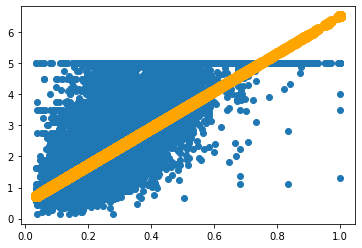

loss =  0.70236784


In [ ]:
from IPython.display import clear_output

for i in range(200):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = 0.5
    w.data -= 0.5 * w.grad
    b.data -= 0.5 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


Мы обучили простейшую модель (это еще, конечно, не нейронная сеть), используя pytorch! 

Теперь вы знаете про pytorch достаточно, чтобы на мини-курсе обучать с помощью этого фреймворка нейронные сети. До встречи!

### Полезные ноутбуки - можно посмотреть:

* [Введение в PyTorch](https://colab.research.google.com/drive/1_OWlyup9twiBz6HtHAjoIwm7bmrZHUO2)
* [Обучение нейросетей в PyTorch](https://colab.research.google.com/drive/1-YE_oAapPlsaxGKG5AR7Ix3_vTQBCo4N)